In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

as i mentioned... that.. 
there is no directory.. of test and train...there is only text file in which there are contents.. like..>
"Akarna_Dhanurasana/16.jpg,1,8,0
Akarna_Dhanurasana/95.jpg,1,8,0
Akarna_Dhanurasana/263.jpg,1,8,0
Akarna_Dhanurasana/110.jpg,1,8,0
Akarna_Dhanurasana/21.jpg,1,8,0
Akarna_Dhanurasana/55.jpg,1,8,0
Akarna_Dhanurasana/34.jpg,1,8,0"

and the images.. are in..
/kaggle/input/82yogaclasses/yoga_images/images...


and the text files...
/kaggle/input/82yogaclasses/yoga_test.txt
/kaggle/input/82yogaclasses/yoga_train.txt


here is one more thing from where i donloaded dataset..
"This repository contains: 
1> Train and test split
	yoga_train.txt
	yoga_test.txt

Each of the split text file structure
row-> each row corresponds to each sample detail
col-> <image_address+name> , <label of class_6> , <label of class_20> , <label of class_82>

2> 82 text files correspond to each of the yoga pose with  
row-> each row corresponds to each sample detail
col-> <image_address+name> , <url>

Save the images in same <folder/image> name as given in 82 text files.


Please cite the following paper if you use this dataset.

@article{verma2020yoga,
  title={Yoga-82: A New Dataset for Fine-grained Classification of Human Poses},
  author={Verma, Manisha and Kumawat, Sudhakar and Nakashima, Yuta and Raman, Shanmuganathan},
  journal={arXiv preprint arXiv:2004.10362},
  year={2020}
}"

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [25]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [26]:
# Paths
data_dir = "/kaggle/input/82yogaclasses/yoga_images"  # Replace with your dataset path
yoga_train_file = "/kaggle/input/82yogaclasses/yoga_train.txt"  # Replace with actual train.txt
yoga_test_file = "/kaggle/input/82yogaclasses/yoga_test.txt"  # Replace with actual test.txt
not_found_file = "/kaggle/working/not_found_images.txt"


In [28]:
validate_images(yoga_train_file, os.path.join(data_dir, 'train'))
validate_images(yoga_test_file, os.path.join(data_dir, 'test'))


In [29]:
# Initialize class names from train.txt
def extract_classes(file_path):
    classes = set()
    with open(file_path, 'r') as f:
        for line in f:
            image_path = line.strip()
            label = os.path.basename(os.path.dirname(image_path))
            classes.add(label)
    return sorted(list(classes))

In [30]:
# Extract class names
class_names = extract_classes(yoga_train_file)

In [31]:
# Validate images function
missing_images = []
found_count = 0
missing_count = 0

In [32]:

def validate_images(file_path):
    global found_count, missing_count
    with open(file_path, 'r') as f:
        for line in f:
            image_path = line.strip()
            if not os.path.exists(image_path):
                missing_images.append(image_path)
                missing_count += 1
            else:
                found_count += 1

    # Save missing images to a file
    if missing_images:
        with open(not_found_file, 'w') as nf:
            nf.write("\n".join(missing_images))

In [33]:
def generate_file_list(data_dir, split_name, output_file):
    split_dir = os.path.join(data_dir, split_name)
    with open(output_file, "w") as f:
        for root, _, files in os.walk(split_dir):
            for file in files:
                f.write(os.path.join(root, file) + "\n")


In [34]:
generate_file_list(data_dir, "train", "/kaggle/input/82yogaclasses/yoga_train.txt")
generate_file_list(data_dir, "test", "/kaggle/input/82yogaclasses/yoga_test.txt")


OSError: [Errno 30] Read-only file system: '/kaggle/input/82yogaclasses/yoga_train.txt'

In [35]:
# Validate train and test images
print("Validating train images...")
validate_images(yoga_train_file)
print("Validating test images...")
validate_images(yoga_test_file)

Validating train images...
Validating test images...


In [36]:
with open("train.txt", "w") as train_file:
    for root, _, files in os.walk(os.path.join(data_dir, "train")):
        for file in files:
            train_file.write(os.path.relpath(os.path.join(root, file), data_dir) + "\n")


In [37]:
# Display counts
print(f"Found: {found_count}, Missing: {missing_count}")

Found: 0, Missing: 28450


In [30]:
# Debugging
if total_missing > 0:
    print("Missing files summary:")
    print("\n".join(missing_images[:10]))  # Display first 10 missing paths for inspection
    print(f"...and {total_missing - 10} more.") if total_missing > 10 else None

Missing files summary:
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/64.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/229.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/128.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/145.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/47.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/121.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/100.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/56.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/200.jpg,1,8,0
/kaggle/input/82yogaclasses/yoga_images/Akarna_Dhanurasana/26.jpg,1,8,0
...and 28440 more.


In [31]:
# Hyperparameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100
LEARNING_RATE = 0.001


In [32]:

# Classes (optional: replace with actual class names)
class_names = os.listdir(os.path.join(data_dir, 'train'))

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/82yogaclasses/yoga_images/train'

In [10]:
# Transformations for data preprocessing and augmentation
transform_train = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])


In [11]:
transform_val = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])


In [12]:
# Load Dataset
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform_train)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform_val)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/82yogaclasses/yoga_images/train'

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
# Visualize Sample Images
def show_images(loader):
    inputs, labels = next(iter(loader))
    grid = torchvision.utils.make_grid(inputs[:16], nrow=4)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0))  # Convert to HWC
    plt.axis("off")
    plt.show()
print("Sample Images:")
show_images(train_loader)


In [ ]:
# Models to Test
models_to_test = {
    "ResNet18": models.resnet18(pretrained=True),
    "VGG16": models.vgg16(pretrained=True),
    "EfficientNetB0": models.efficientnet_b0(pretrained=True),
    "DenseNet121": models.densenet121(pretrained=True),
}


In [ ]:
# Modify final layers for classification
for name, model in models_to_test.items():
    if "fc" in dir(model):  # For ResNet-like models
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, len(class_names))
        )
    elif "classifier" in dir(model):  # For VGG-like models
        model.classifier[-1] = nn.Sequential(
            nn.Linear(model.classifier[-1].in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, len(class_names))
        )

In [ ]:
# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=EPOCHS):
    best_val_acc = 0
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), f"{model.__class__.__name__}_best.pth")
            print(f"Saved Best Model: {model.__class__.__name__}")

    return best_val_acc


In [ ]:
# Train and Evaluate Models
criterion = nn.CrossEntropyLoss()
results = {}

In [ ]:
for model_name, model in models_to_test.items():
    print(f"\nTraining {model_name}...")
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    acc = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=EPOCHS)
    results[model_name] = acc

In [ ]:
# Display Results
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

In [ ]:

# Save the Best Model
best_model = models_to_test[best_model_name].to(device)
torch.save(best_model.state_dict(), f"{best_model_name}_final.pth")
print(f"Best Model Saved as {best_model_name}_final.pth")


In [10]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 41.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.1.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 18.1.0 which is inc

# 2nd trial

In [21]:
import os
import numpy as np
import tensorflow as tf
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
    Input, GlobalAveragePooling2D, BatchNormalization
)
from tensorflow.keras.applications import (
    MobileNetV2, 
    ResNet50V2, 
    EfficientNetB0
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [22]:
# Configuration Variables
DATA_DIR = "/kaggle/input/82yogaclasses/yoga_images"
TRAIN_FILE = "/kaggle/input/82yogaclasses/yoga_train.txt"
IMAGES_DIR = os.path.join(DATA_DIR, "images")
NUM_CLASSES = 82
IMG_SIZE = (224, 224)

In [23]:
def load_dataset(train_file, images_dir):

    image_paths = []
    labels = []
    
    with open(train_file, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            image_path = os.path.join(images_dir, parts[0])
            label = int(parts[2])  # 82-class label
            image_paths.append(image_path)
            labels.append(label)
    
    return image_paths, labels

In [24]:
def preprocess_image(image_path, target_size=(224, 224)):

    try:
        # Check if file exists
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            return None
        
        # Read image with error checking
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Failed to load image: {image_path}")
            return None
        
        # Convert and preprocess
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = img / 255.0
        return img
    
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


In [25]:
def create_models(num_classes):

    def build_custom_cnn():
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            BatchNormalization(),
            GlobalAveragePooling2D(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
        return model

    def build_transfer_learning_model(base_model):
        base = base_model(
            weights='imagenet', 
            include_top=False, 
            input_shape=(224, 224, 3)
        )
        base.trainable = False
        
        inputs = Input(shape=(224, 224, 3))
        x = base(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        outputs = Dense(num_classes, activation='softmax')(x)
        
        return Model(inputs=inputs, outputs=outputs)

    models = {
        'Custom CNN': build_custom_cnn(),
        'MobileNetV2': build_transfer_learning_model(MobileNetV2),
        'ResNet50V2': build_transfer_learning_model(ResNet50V2),
        'EfficientNetB0': build_transfer_learning_model(EfficientNetB0)
    }
    return models

In [26]:
def train_and_evaluate_models(train_file, images_dir, num_classes):

    # Load dataset
    image_paths, labels = load_dataset(train_file, images_dir)
    
    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(
        image_paths, labels, test_size=0.2, random_state=42
    )
    
    # Prepare data with error filtering
    X_train_processed = [preprocess_image(path) for path in X_train]
    X_val_processed = [preprocess_image(path) for path in X_val]
    
    # Remove None values
    X_train = np.array([img for img in X_train_processed if img is not None])
    X_val = np.array([img for img in X_val_processed if img is not None])
    
    # Filter corresponding labels
    y_train = np.array([label for img, label in zip(X_train_processed, y_train) if img is not None])
    y_val = np.array([label for img, label in zip(X_val_processed, y_val) if img is not None])
    
    # Validate data after preprocessing
    print(f"Training images after preprocessing: {len(X_train)}")
    print(f"Validation images after preprocessing: {len(X_val)}")
    
    # Check if we have any images left
    if len(X_train) == 0 or len(X_val) == 0:
        raise ValueError("No images could be loaded. Check your image paths and file integrity.")
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
    
    # Create models
    models = create_models(num_classes)
    
    # Model training and evaluation
    results = {}
    
    for name, model in models.items():
        print(f"Training {name}")
        
        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Callbacks
        early_stop = EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True
        )
        
        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stop]
        )
        
        # Evaluate model
        val_loss, val_accuracy = model.evaluate(X_val, y_val)
        results[name] = {
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'history': history
        }
        
        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} - Loss')
        plt.legend()
        plt.show()
    
    return results

In [27]:
def pose_detection_pipeline(image_path):

    # MediaPipe Pose Detection
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils
    
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Pose detection
    with mp_pose.Pose(
        static_image_mode=True, 
        min_detection_confidence=0.5
    ) as pose:
        results = pose.process(image_rgb)
    
    # Draw landmarks and analyze
    if results.pose_landmarks:
        # Annotate image with landmarks
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image, 
            results.pose_landmarks, 
            mp_pose.POSE_CONNECTIONS
        )
        
        # Convert to RGB for matplotlib display
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        
        # Display annotated image
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_image_rgb)
        plt.axis('off')
        plt.title('Pose Landmarks')
        plt.show()
        
        # Analyze pose landmarks
        landmarks = results.pose_landmarks.landmark
        corrections = analyze_pose_alignment(landmarks)
        
        return annotated_image, corrections
    
    return image, []

In [28]:
def analyze_pose_alignment(landmarks):

    corrections = []
    
    # Hip alignment check
    left_hip = landmarks[mp.solutions.pose.PoseLandmark.LEFT_HIP]
    right_hip = landmarks[mp.solutions.pose.PoseLandmark.RIGHT_HIP]
    
    if abs(left_hip.y - right_hip.y) > 0.1:
        corrections.append("Adjust hip alignment: hips should be level")
    
    # Knee alignment check
    left_knee = landmarks[mp.solutions.pose.PoseLandmark.LEFT_KNEE]
    right_knee = landmarks[mp.solutions.pose.PoseLandmark.RIGHT_KNEE]
    
    if abs(left_knee.x - right_knee.x) > 0.1:
        corrections.append("Align knees: keep them in line with hips")
    
    # Spine alignment check
    shoulder_center_y = (
        landmarks[mp.solutions.pose.PoseLandmark.LEFT_SHOULDER].y + 
        landmarks[mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER].y
    ) / 2
    hip_center_y = (left_hip.y + right_hip.y) / 2
    
    if abs(shoulder_center_y - hip_center_y) > 0.2:
        corrections.append("Straighten spine: maintain a neutral, aligned posture")
    
    return corrections

In [ ]:
# Jupyter Notebook Usage
# 1. Train and Compare Models
model_results = train_and_evaluate_models(TRAIN_FILE, IMAGES_DIR, NUM_CLASSES)

In [ ]:
# 2. Print Model Performance
for name, result in model_results.items():
    print(f"{name}:")
    print(f"  Validation Loss: {result['val_loss']}")
    print(f"  Validation Accuracy: {result['val_accuracy']}")

In [ ]:
# 3. Pose Detection Example
sample_image = os.path.join(IMAGES_DIR, "Akarna_Dhanurasana/16.jpg")
corrected_image, pose_corrections = pose_detection_pipeline(sample_image)


In [ ]:
print("\nPose Corrections:")
for correction in pose_corrections:
    print(f"- {correction}")

# another trial.. hope in no limit exceewd


In [13]:
import os
import numpy as np
import tensorflow as tf
import cv2
import random
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
    Input, GlobalAveragePooling2D, BatchNormalization
)
from tensorflow.keras.applications import (
    MobileNetV2, 
    ResNet50V2, 
    EfficientNetB0
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [14]:
# Configuration Variables
DATA_DIR = "/kaggle/input/82yogaclasses/yoga_images"
TRAIN_FILE = "/kaggle/input/82yogaclasses/yoga_train.txt"
IMAGES_DIR = os.path.join(DATA_DIR, "images")
NUM_CLASSES = 82
IMG_SIZE = (224, 224)
FAILED_IMAGES_FILE = "failed_images.txt"

In [15]:
def load_dataset(train_file, images_dir):
    image_paths = []
    labels = []

    with open(train_file, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            image_path = os.path.join(images_dir, parts[0])
            label = int(parts[2])  # 82-class label
            image_paths.append(image_path)
            labels.append(label)

    return image_paths, labels

In [16]:
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        # Check if file exists
        if not os.path.exists(image_path):
            return None, "File not found"

        # Read image with error checking
        img = cv2.imread(image_path)

        if img is None:
            return None, "Failed to load image"

        # Convert and preprocess
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = img / 255.0
        return img, None

    except Exception as e:
        return None, str(e)

In [17]:
def filter_and_log_images(image_paths, labels, target_size):
    processed_images = []
    processed_labels = []
    failed_images = []

    for path, label in zip(image_paths, labels):
        img, error = preprocess_image(path, target_size)
        if img is not None:
            processed_images.append(img)
            processed_labels.append(label)
        else:
            failed_images.append((path, error))

    # Log failed images
    with open(FAILED_IMAGES_FILE, 'w') as f:
        for path, error in failed_images:
            f.write(f"{path}: {error}\n")

    print(f"Total Images Processed: {len(processed_images)}")
    print(f"Total Failed Images: {len(failed_images)}")
    return np.array(processed_images), np.array(processed_labels)


In [18]:
def visualize_samples(images, labels, num_samples=5):
    indices = random.sample(range(len(images)), min(num_samples, len(images)))
    for i in indices:
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()


In [19]:
def train_and_evaluate_models(train_file, images_dir, num_classes):
    # Load dataset
    image_paths, labels = load_dataset(train_file, images_dir)

    # Split dataset
    X_train_paths, X_val_paths, y_train, y_val = train_test_split(
        image_paths, labels, test_size=0.2, random_state=42
    )

    # Preprocess and filter images
    print("Processing training images...")
    X_train, y_train = filter_and_log_images(X_train_paths, y_train, IMG_SIZE)
    print("Processing validation images...")
    X_val, y_val = filter_and_log_images(X_val_paths, y_val, IMG_SIZE)

    # Check if we have any images left
    if len(X_train) == 0 or len(X_val) == 0:
        raise ValueError("No images could be loaded. Check your image paths and file integrity.")

    # Visualize a few samples from training set
    print("Visualizing sample images from training data...")
    visualize_samples(X_train, y_train)

    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

    # Create models
    models = create_models(num_classes)

    # Model training and evaluation
    results = {}

    for name, model in models.items():
        print(f"Training {name}")

        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Callbacks
        early_stop = EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True
        )

        # Train model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stop]
        )

        # Evaluate model
        val_loss, val_accuracy = model.evaluate(X_val, y_val)
        results[name] = {
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'history': history
        }

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} - Loss')
        plt.legend()
        plt.show()

    return results

Processing training images...


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 21 extraneous bytes before marker 0xd9
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 35 extraneous bytes before marker 0xd9
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Total Images Processed: 10354
Total Failed Images: 6441
Processing validation images...


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 2932 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile


Total Images Processed: 2579
Total Failed Images: 1620
Visualizing sample images from training data...


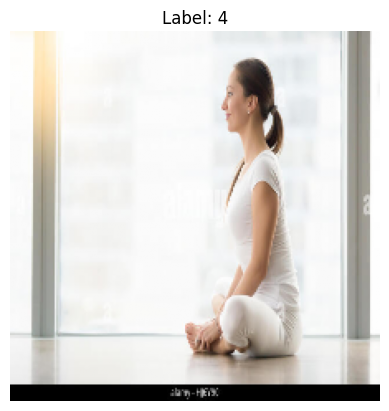

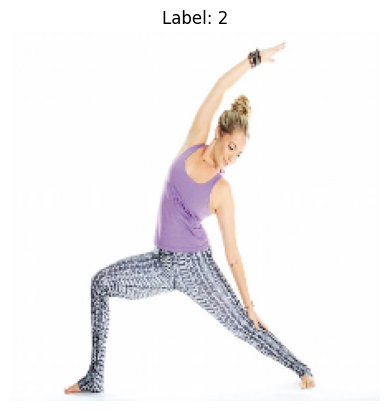

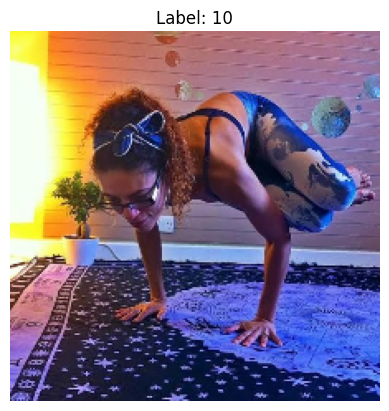

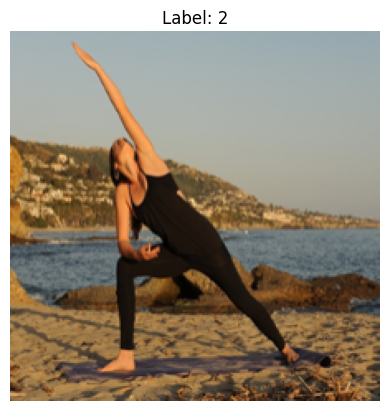

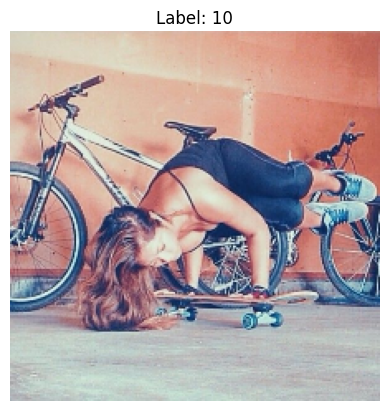

NameError: name 'create_models' is not defined

In [20]:
model_results = train_and_evaluate_models(TRAIN_FILE, IMAGES_DIR, NUM_CLASSES)
for name, result in model_results.items():
    print(f"{name}:")
    print(f"  Validation Loss: {result['val_loss']}")
    print(f"  Validation Accuracy: {result['val_accuracy']}")

# another another


In [31]:
import os
import numpy as np
import tensorflow as tf
import cv2
import random
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, 
    Input, GlobalAveragePooling2D, BatchNormalization
)
from tensorflow.keras.applications import (
    MobileNetV2, 
    ResNet50V2, 
    EfficientNetB0
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [32]:

# Configuration Variables
DATA_DIR = "/kaggle/input/82yogaclasses/yoga_images"
TRAIN_FILE = "/kaggle/input/82yogaclasses/yoga_train.txt"
IMAGES_DIR = os.path.join(DATA_DIR, "images")
NUM_CLASSES = 82
IMG_SIZE = (224, 224)
FAILED_IMAGES_FILE = "failed_images.txt"
SAVED_MODEL_DIR = "saved_models"

In [33]:
if not os.path.exists(SAVED_MODEL_DIR):
    os.makedirs(SAVED_MODEL_DIR)


# Tab 1: Dataset Loading and Preprocessing

In [34]:
# Tab 1: Dataset Loading and Preprocessing
def load_dataset(train_file, images_dir):
    image_paths = []
    labels = []

    with open(train_file, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            image_path = os.path.join(images_dir, parts[0])
            label = int(parts[2])  # 82-class label
            image_paths.append(image_path)
            labels.append(label)

    return image_paths, labels

In [35]:
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        if not os.path.exists(image_path):
            return None, "File not found"

        img = cv2.imread(image_path)

        if img is None:
            return None, "Failed to load image"

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, target_size)
        img = img / 255.0
        return img, None

    except Exception as e:
        return None, str(e)

In [36]:

def filter_and_log_images(image_paths, labels, target_size):
    processed_images = []
    processed_labels = []
    failed_images = []

    for path, label in zip(image_paths, labels):
        img, error = preprocess_image(path, target_size)
        if img is not None:
            processed_images.append(img)
            processed_labels.append(label)
        else:
            failed_images.append((path, error))

    with open(FAILED_IMAGES_FILE, 'w') as f:
        for path, error in failed_images:
            f.write(f"{path}: {error}\n")

    print(f"Total Images Processed: {len(processed_images)}")
    print(f"Total Failed Images: {len(failed_images)}")
    return np.array(processed_images), np.array(processed_labels)

In [37]:
def visualize_samples(images, labels, num_samples=5):
    indices = random.sample(range(len(images)), min(num_samples, len(images)))
    for i in indices:
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

# Tab 2: Model Creation and Training

In [38]:
def create_models(num_classes):
    def build_custom_cnn():
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Conv2D(128, (3, 3), activation='relu'),
            BatchNormalization(),
            GlobalAveragePooling2D(),
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
        return model

    def build_transfer_learning_model(base_model):
        base = base_model(
            weights='imagenet', 
            include_top=False, 
            input_shape=(224, 224, 3)
        )
        base.trainable = False

        inputs = Input(shape=(224, 224, 3))
        x = base(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        x = Dropout(0.5)(x)
        outputs = Dense(num_classes, activation='softmax')(x)

        return Model(inputs=inputs, outputs=outputs)

    models = {
        'Custom CNN': build_custom_cnn(),
        'MobileNetV2': build_transfer_learning_model(MobileNetV2),
        'ResNet50V2': build_transfer_learning_model(ResNet50V2),
        'EfficientNetB0': build_transfer_learning_model(EfficientNetB0)
    }
    return models

In [39]:
def train_and_evaluate_models(train_file, images_dir, num_classes):
    image_paths, labels = load_dataset(train_file, images_dir)

    X_train_paths, X_val_paths, y_train, y_val = train_test_split(
        image_paths, labels, test_size=0.2, random_state=42
    )

    print("Processing training images...")
    X_train, y_train = filter_and_log_images(X_train_paths, y_train, IMG_SIZE)
    print("Processing validation images...")
    X_val, y_val = filter_and_log_images(X_val_paths, y_val, IMG_SIZE)

    if len(X_train) == 0 or len(X_val) == 0:
        raise ValueError("No images could be loaded. Check your image paths and file integrity.")

    print("Visualizing sample images from training data...")
    visualize_samples(X_train, y_train)

    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

    models = create_models(num_classes)

    results = {}

    for name, model in models.items():
        print(f"Training {name}")

        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        early_stop = EarlyStopping(
            monitor='val_loss', 
            patience=10, 
            restore_best_weights=True
        )

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=50,
            batch_size=32,
            callbacks=[early_stop]
        )

        val_loss, val_accuracy = model.evaluate(X_val, y_val)
        results[name] = {
            'val_loss': val_loss,
            'val_accuracy': val_accuracy,
            'history': history
        }

        model.save(os.path.join(SAVED_MODEL_DIR, f"{name.replace(' ', '_')}.h5"))

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{name} - Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} - Loss')
        plt.legend()
        plt.show()

    best_model_name = max(results, key=lambda k: results[k]['val_accuracy'])
    print(f"Best Model: {best_model_name}")
    return results, best_model_name

In [40]:
def evaluate_saved_model(model_path, X_test, y_test):
    # Load the saved model
    model = tf.keras.models.load_model(model_path)
    
    # Predict and calculate metrics
    predictions = model.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(NUM_CLASSES), 
                yticklabels=range(NUM_CLASSES))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


# Step 2: Load and Preprocess Data

In [41]:
image_paths, labels = load_dataset(TRAIN_FILE, IMAGES_DIR)

In [42]:
X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

In [ ]:
# Process images
X_train, y_train = filter_and_log_images(X_train_paths, y_train, IMG_SIZE)
X_val, y_val = filter_and_log_images(X_val_paths, y_val, IMG_SIZE)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 21 extraneous bytes before marker 0xd9
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 35 extraneous bytes before marker 0xd9
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Total Images Processed: 10354
Total Failed Images: 6441


In [ ]:
# Visualize samples
visualize_samples(X_train, y_train)


In [ ]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)

# Step 3: Train and Save Models


In [ ]:
results, best_model_name = train_and_evaluate_models(TRAIN_FILE, IMAGES_DIR, NUM_CLASSES)
print(f"Best Model: {best_model_name}")


# Step 4: Test the Saved Model

In [ ]:
X_test_paths, _, y_test, _ = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)


In [ ]:
X_test, y_test = filter_and_log_images(X_test_paths, y_test, IMG_SIZE)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)

In [ ]:
best_model_path = os.path.join(SAVED_MODEL_DIR, f"{best_model_name.replace(' ', '_')}.h5")
evaluate_saved_model(best_model_path, X_test, y_test)
